# Kappa experiment

In [146]:
%matplotlib inline

import os
import sys
import copy
import numpy as np

# filtering Astropy warnings
import warnings
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter('ignore', category=AstropyWarning)

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

sys.path.append('../lib/')
from hdmclouds_v1 import *
from utils import *
from graph import *
from preprocessing import *
from gmr import *

from ipywidgets import interact, interactive, fixed, FloatSlider, IntSlider
from IPython.display import display

import matplotlib
import matplotlib.pyplot as plt; plt.show()
matplotlib.rcParams.update({'font.size': 20})

#from pycupid import *
#from pycupid import *
def load_data(fits_path):
    hdu = fits.open(fits_path)[0]
    data = hdu.data
    wcs = WCS(hdu.header)

    if data.ndim>3:
        # droping out the stokes dimension
        data = np.ascontiguousarray(data[0])
        wcs = wcs.dropaxis(3)

        if data.shape[0]==1:
            # in case data is not a cube but an image
            data = np.ascontiguousarray(data[0])
            wcs = wcs.dropaxis(2)
    
    # in case NaN values exist on data
    mask = np.isnan(data)
    if np.any(mask): data = ma.masked_array(data, mask=mask)

    return data,wcs,hdu

save_path = "/Users/martin/Dropbox/Aplicaciones/ShareLaTeX/HDMC-3rd_mnras_submission/figures/"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/martin/anaconda3/lib/python3.6/site-packages/spectral_cube/cube_utils.py:114: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  stokes_arrays[stokes_names[i_stokes]] = array[array_slice]


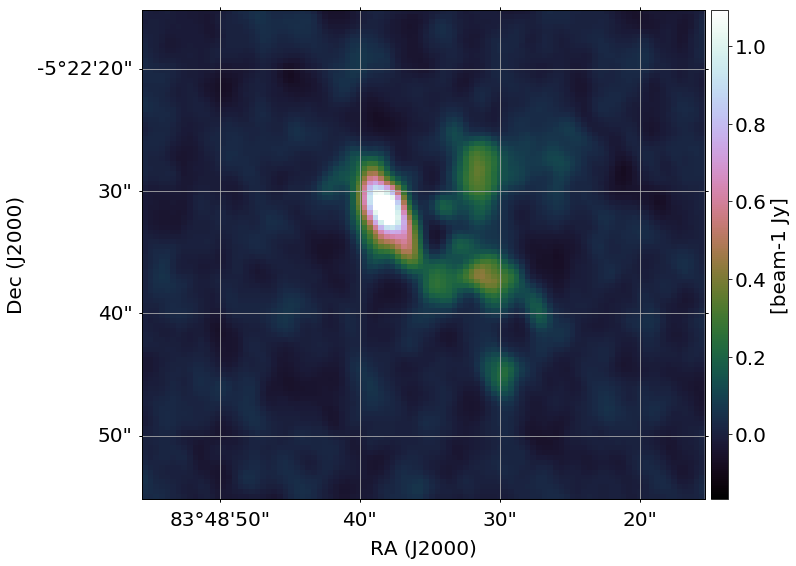

In [134]:
fits_path = '../data/images/Orion.cont.image.fits'
#fits_path = '../data/images/OphA_ExtnCambR_F.fits'
#fits_path = '../data/images/PerA_Extn2MASS_F_Gal.fits'
#fits_path = '../data/images/RhoOphiuchus60.fits'
#fits_path = '../data/images/perseus60.fits'
#fits_path = '../data/SCIMES/orion_12CO_mom0.fits'

data,wcs,hdu,spec = load_data(fits_path)
base_level = estimate_rms(data)
image_plot(data, wcs=wcs, unit=hdu.header["BUNIT"])

In [135]:
preprocessing(data, wcs)

interactive(children=(FloatSlider(value=0.10237737624469602, description='back_level', max=0.20475475248939204…

back_level:  0.10237737624469602


In [136]:
res_rms_list = []
res_inf_list = []
time_list = []
hdmc_list = []
kappa_values = np.arange(0.1, 5.1, 0.1)

for kappa in kappa_values:
    hdmc = HDMClouds(data, back_level=0.089, wcs=wcs, verbose=False, n_gaussians=200, eps=100., kappa=kappa)
    hdmc.build_gmr()
    res_rms,res_inf,_,_,_ = hdmc.get_residual_stats(verbose=False)
    res_rms_list.append(res_rms)
    res_inf_list.append(res_inf)
    time_list.append(hdmc.elapsed_time)
    hdmc_list.append(hdmc)

[INFO] Number of pixels with significant emission: 749
[INFO] Level of compression: 26.702269692923895%
[INFO] Number of ICEs: 1
Isolated Cloud Entity A: 749 pixels of significant emission.
---------------------------------------------
Building GM for Isolated Cloud Entity A
---------------------------------------------
RESIDUAL STATS
RMS of residual: 0.08018050111336485
Inf norm of residual: 0.3980300428576462
Variance of residual: 0.005383524952819583
Normalized flux addition: 0.06991225038499373
Normalized flux lost: 0.2863757666226374


[INFO] Number of pixels with significant emission: 749
[INFO] Level of compression: 26.702269692923895%
[INFO] Number of ICEs: 1
Isolated Cloud Entity A: 749 pixels of significant emission.
---------------------------------------------
Building GM for Isolated Cloud Entity A
---------------------------------------------
RESIDUAL STATS
RMS of residual: 0.03564640756590372
Inf norm of residual: 0.14905282644384302
Variance of residual: 0.0012692691484

***

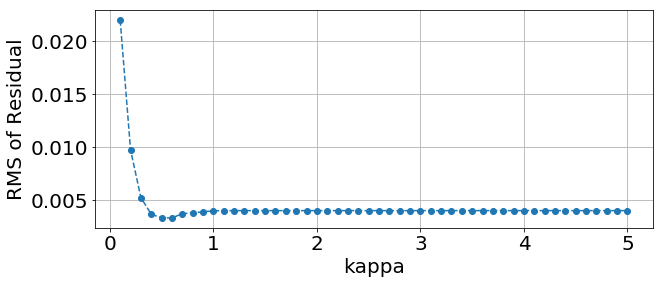

In [139]:
plt.figure(figsize=(10,4))
plt.plot(kappa_values, res_rms_list, "o--")
plt.xlabel("kappa")
plt.ylabel("RMS of Residual")
plt.grid()

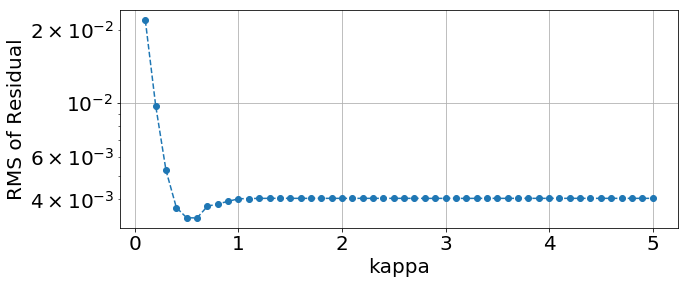

In [140]:
plt.figure(figsize=(10,4))
plt.semilogy(kappa_values, res_rms_list, "o--")
plt.xlabel("kappa")
plt.ylabel("RMS of Residual")
plt.grid()

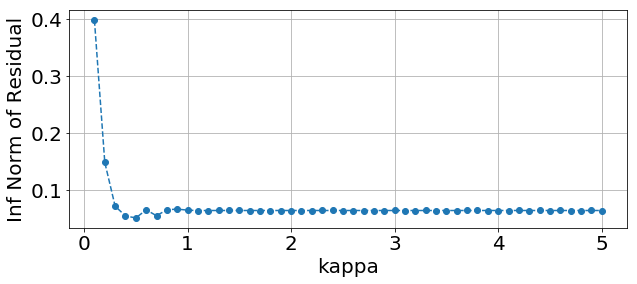

In [141]:
plt.figure(figsize=(10,4))
plt.plot(kappa_values, res_inf_list, "o--")
plt.xlabel("kappa")
plt.ylabel("Inf-Norm of Residual")
plt.grid()

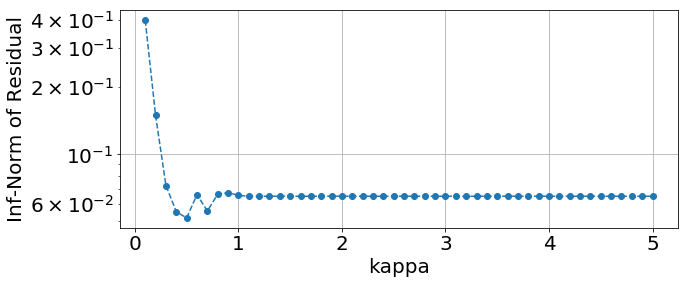

In [142]:
plt.figure(figsize=(10,4))
plt.semilogy(kappa_values, res_inf_list, "o--")
plt.xlabel("kappa")
plt.ylabel("Inf-Norm of Residual")
plt.grid()

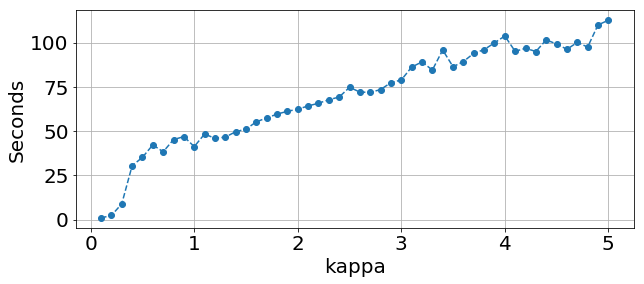

In [143]:
plt.figure(figsize=(10,4))
plt.plot(kappa_values, time_list, "o--")
plt.xlabel("kappa")
plt.ylabel("Seconds")
plt.grid()

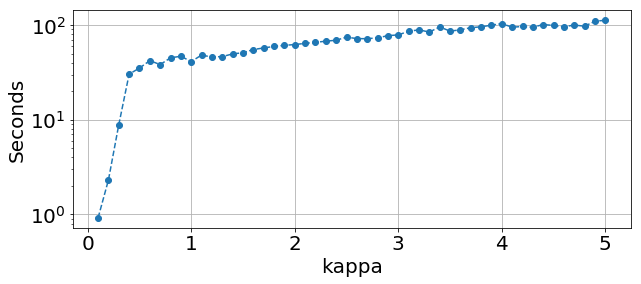

In [144]:
plt.figure(figsize=(10,4))
plt.semilogy(kappa_values, time_list, "o--")
plt.xlabel("kappa")
plt.ylabel("Seconds")
plt.grid()

***

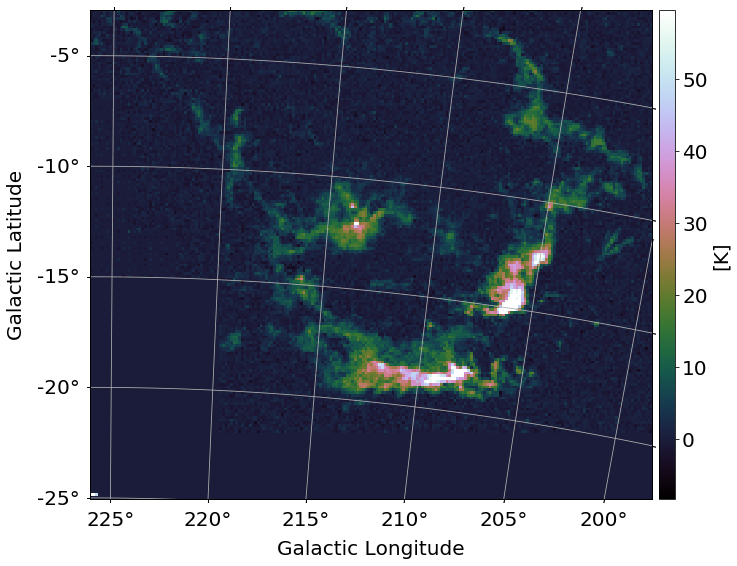

In [147]:
#fits_path = '../data/images/Orion.cont.image.fits'
#fits_path = '../data/images/OphA_ExtnCambR_F.fits'
#fits_path = '../data/images/PerA_Extn2MASS_F_Gal.fits'
#fits_path = '../data/images/RhoOphiuchus60.fits'
#fits_path = '../data/images/perseus60.fits'
fits_path = '../data/SCIMES/orion_12CO_mom0.fits'

data,wcs,hdu = load_data(fits_path)
base_level = estimate_rms(data)
image_plot(data, wcs=wcs, unit=hdu.header["BUNIT"], save_path="./orion_12CO_mom0.png")